In [18]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import gensim
from sklearn.svm import LinearSVC

In [2]:
imdb = "E:/Momo/Datasets/imdbreviews/IMDB Dataset.csv"

df = pd.read_csv(imdb)
print(df.shape)
df.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
def clean_text(text):
    text=str(text).lower()
    text=re.sub('\[.*?\]', '', text)
    text=re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = gensim.parsing.remove_stopwords(text)
    return text

df['review']=df['review'].apply(clean_text)
df.head()

,review,sentiment
0,reviewers mentioned watching oz episode you'll...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there's family little boy (jake) thi...,negative
4,"petter mattei's ""love time money"" visually stu...",positive


In [8]:
# Split features and labels
X = df["review"]
y = df["sentiment"]

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=0)

print(X_train.shape, X_test.shape)

(30000,) (20000,)


In [9]:
# Create feature vectors
vectorizer = CountVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

In [13]:
len(vectorizer.vocabulary_)

82172

In [14]:
model = MultinomialNB()
model.fit(train_vectors, y_train)

MultinomialNB()

In [15]:
y_pred = model.predict(test_vectors)

In [16]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8558


[[8810 1258]
 [1626 8306]]


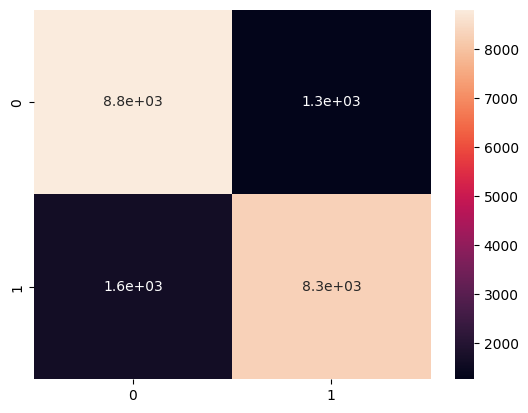

In [17]:
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True)
print(cm)

In [31]:
model = LinearSVC(C=0.01)


In [32]:
model.fit(train_vectors, y_train)

LinearSVC(C=0.01)

In [33]:
y_pred = model.predict(test_vectors)

In [34]:
print(accuracy_score(y_test, y_pred))

0.88585
